In [4]:
import collections

In [1]:
def load_words(filename="brown_nouns.txt"):
    """Reads words from the specified file and returns a clean list."""
    with open(filename, 'r') as f:
        words = [line.strip().lower() for line in f.readlines()]
    # Return a sorted list of unique words
    return sorted(list(set(words)))

words = load_words()
print(f"Loaded {len(words)} unique words.")
print("Sample words:", words[15:25])

Loaded 17892 unique words.
Sample words: ['$.86', '$.90', '$0.9', '$1,000', '$1,000,000', '$1,000,000,000', '$1,200', '$1,250,000', '$1,276', '$1,390']


In [2]:
class TrieNode:
    """A node in the Trie structure."""
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.is_end_of_word = False
        # This is our frequency measure.
        self.count = 0

class Trie:
    """The main Trie class."""
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        """Inserts a word into the trie, updating frequency counts."""
        node = self.root
        for char in word:
            node = node.children[char]
            # Increment the count for every node in the path.
            node.count += 1
        node.is_end_of_word = True

    def build_trie(self, word_list):
        """Builds the trie from a list of words."""
        for word in word_list:
            self.insert(word)

In [5]:
def stem_with_prefix_trie(word, trie):
    """
    Finds the stem and suffix of a word using a pre-built prefix trie.
    """
    node = trie.root
    path = []
    max_score = -1
    split_index = -1

    # We don't consider the root or the final leaf node as split points
    for i, char in enumerate(word[:-1]):
        if char not in node.children:
            return word, "" # Should not happen if trie is built correctly
        node = node.children[char]
        path.append(char)

        # Calculate the split score using our frequency-based heuristic
        branching_factor = len(node.children)
        frequency = node.count
        score = branching_factor * frequency

        # A split point is only valid if there's actual branching
        if score > max_score and branching_factor > 1:
            max_score = score
            split_index = i + 1

    if split_index != -1:
        stem = word[:split_index]
        suffix = word[split_index:]
        return stem, suffix
    else:
        # No suitable split point found
        return word, ""

# 1. Build the Prefix Trie
prefix_trie = Trie()
prefix_trie.build_trie(words)

# 2. Stem a few example words and print the output
print("--- Prefix Trie Stemming Results ---")
test_words = ['goes', 'kites', 'processes', 'processing', 'cars']
for word in test_words:
    stem, suffix = stem_with_prefix_trie(word, prefix_trie)
    if suffix:
        print(f"{word}={stem}+{suffix}")
    else:
        print(f"{word}={stem}")

--- Prefix Trie Stemming Results ---
goes=goes
kites=k+ites
processes=p+rocesses
processing=p+rocessing
cars=c+ars


In [6]:
def stem_with_suffix_trie(word, trie):
    """
    Finds the stem and suffix of a word using a pre-built suffix trie.
    Note: The trie must be built with reversed words.
    """
    reversed_word = word[::-1]
    node = trie.root
    max_score = -1
    split_len_suffix = 0 # Length of the suffix

    # Traverse the trie with the reversed word
    for i, char in enumerate(reversed_word[:-1]):
        if char not in node.children:
            return word, ""
        node = node.children[char]

        # Calculate score using our frequency-based heuristic
        branching_factor = len(node.children)
        frequency = node.count
        score = branching_factor * frequency

        # If this is a better split point, update it
        if score > max_score and branching_factor > 1:
            max_score = score
            split_len_suffix = i + 1

    if split_len_suffix > 0:
        # The suffix is the first 'split_len_suffix' chars of the reversed word,
        # reversed back to normal.
        suffix = reversed_word[:split_len_suffix][::-1]
        stem = word[:-split_len_suffix]
        # Avoid creating stems that are too short (e.g., 'go' -> 'g'+'o')
        if len(stem) > 2:
            return stem, suffix
        else:
            return word, ""
    else:
        return word, ""

# 1. Build the Suffix Trie with reversed words
suffix_trie = Trie()
reversed_words = [w[::-1] for w in words]
suffix_trie.build_trie(reversed_words)


# 2. Stem all words and print the output
print("--- Suffix Trie Stemming Results ---")
for word in words:
    stem, suffix = stem_with_suffix_trie(word, suffix_trie)
    if suffix:
        print(f"{word}={stem}+{suffix}")

--- Suffix Trie Stemming Results ---
$.027=$.02+7
$.03=$.0+3
$.054/mbf=$.054/mb+f
$.07=$.0+7
$.07/cwt=$.07/cw+t
$.076=$.07+6
$.09=$.0+9
$.105=$.10+5
$.12=$.1+2
$.30=$.3+0
$.30/mbf=$.30/mb+f
$.50=$.5+0
$.65=$.6+5
$.75=$.7+5
$.80=$.8+0
$.86=$.8+6
$.90=$.9+0
$0.9=$0.+9
$1,000=$1,00+0
$1,000,000=$1,000,00+0
$1,000,000,000=$1,000,000,00+0
$1,200=$1,20+0
$1,250,000=$1,250,00+0
$1,276=$1,27+6
$1,390=$1,39+0
$1,450,000,000=$1,450,000,00+0
$1,500=$1,50+0
$1,500,000=$1,500,00+0
$1,600=$1,60+0
$1,750,000=$1,750,00+0
$1,800=$1,80+0
$1,961,000=$1,961,00+0
$1.0=$1.+0
$1.00=$1.0+0
$1.1=$1.+1
$1.10=$1.1+0
$1.26=$1.2+6
$1.4=$1.+4
$1.5=$1.+5
$1.6=$1.+6
$1.60=$1.6+0
$1.65=$1.6+5
$1.7=$1.+7
$1.8=$1.+8
$1.80=$1.8+0
$1.9=$1.+9
$10,000=$10,00+0
$10,000,000=$10,000,00+0
$10.00=$10.0+0
$10.1=$10.+1
$10.3=$10.+3
$10.50=$10.5+0
$10.8=$10.+8
$100=$10+0
$100,000=$100,00+0
$102,285,000=$102,285,00+0
$1020=$102+0
$109=$10+9
$11,900,000=$11,900,00+0
$11.50=$11.5+0
$110=$11+0
$115,000=$115,00+0
$12,192,865=$12,192,86+

Successfully loaded 17892 unique words from brown_nouns.txt


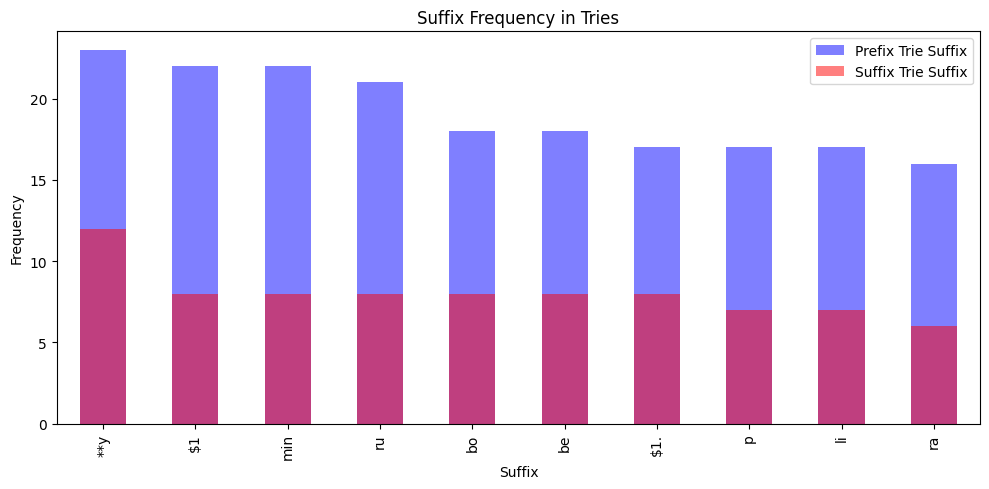

In [9]:
try:
    with open('brown_nouns.txt', 'r') as f:
        # Read words, strip whitespace, convert to lowercase, and get unique entries
        words = sorted(list(set([line.strip().lower() for line in f])))
    print(f"Successfully loaded {len(words)} unique words from brown_nouns.txt")
except FileNotFoundError:
    print("Error: brown_nouns.txt not found. Please make sure the file is in the correct directory.")
    words = [] # Set words to empty list to avoid crashing the script

class TrieNode:
    def __init__(self):
        self.children = {}
        self.word_end = False
        self.words_at_node = set()

class Trie:
    def __init__(self):
        self.root = TrieNode()
    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.words_at_node.add(word)
        node.word_end = True
    def insert_reversed(self, word):
        node = self.root
        for char in word[::-1]:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.words_at_node.add(word)
        node.word_end = True
    def split_stem_suffix(self, word, reverse=False):
        node = self.root
        branching_index = 0
        max_branch = 0
        traversed = []
        word_seq = word[::-1] if reverse else word
        for idx, char in enumerate(word_seq):
            traversed.append(char)
            node = node.children[char]
            branch_count = len(node.children)
            if branch_count > max_branch:
                max_branch = branch_count
                branching_index = idx + 1
        stem = word_seq[:branching_index]
        suffix = word_seq[branching_index:]
        stem = stem[::-1] if reverse else stem
        suffix = suffix[::-1] if reverse else suffix
        return stem, suffix, max_branch

prefix_trie = Trie()
suffix_trie = Trie()
for w in words:
    prefix_trie.insert(w)
    suffix_trie.insert_reversed(w)

prefix_results = []
suffix_results = []
prefix_frequencies = {}
suffix_frequencies = {}
for w in words:
    stem, suffix, freq = prefix_trie.split_stem_suffix(w)
    prefix_results.append({'word': w, 'stem': stem, 'suffix': suffix, 'freq': freq})
    if suffix:
        prefix_frequencies[suffix] = prefix_frequencies.get(suffix, 0)+1
    stem_s, suffix_s, freq_s = suffix_trie.split_stem_suffix(w, reverse=True)
    suffix_results.append({'word': w, 'stem': stem_s, 'suffix': suffix_s, 'freq': freq_s})
    if suffix_s:
        suffix_frequencies[suffix_s] = suffix_frequencies.get(suffix_s, 0)+1

import pandas as pd
import matplotlib.pyplot as plt
prefix_df = pd.DataFrame(prefix_results)
suffix_df = pd.DataFrame(suffix_results)

prefix_freq_series = pd.Series(prefix_frequencies)
suffix_freq_series = pd.Series(suffix_frequencies)

plt.figure(figsize=(10,5))
prefix_freq_series.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.5, color='blue', label='Prefix Trie Suffix')
suffix_freq_series.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.5, color='red', label='Suffix Trie Suffix')
plt.title('Suffix Frequency in Tries')
plt.xlabel('Suffix')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('suffix_freq_plot.png')
prefix_df.to_csv('prefix_stem_suffix.csv', index=False)
suffix_df.to_csv('suffix_stem_suffix.csv', index=False)


Successfully loaded 17892 unique words from brown_nouns.txt

TRIE METRICS

--- Prefix Trie Metrics ---
Total Nodes              : 54977
Average Depth            : 7.7919
Average Branching Factor : 1.3067
Average Entropy          : 0.2305

--- Suffix Trie Metrics ---
Total Nodes              : 57014
Average Depth            : 7.7919
Average Branching Factor : 1.3816
Average Entropy          : 0.2409


Generated suffix frequency plot: 'suffix_freq_plot.png'
Generated CSV outputs: 'prefix_stem_suffix.csv' and 'suffix_stem_suffix.csv'


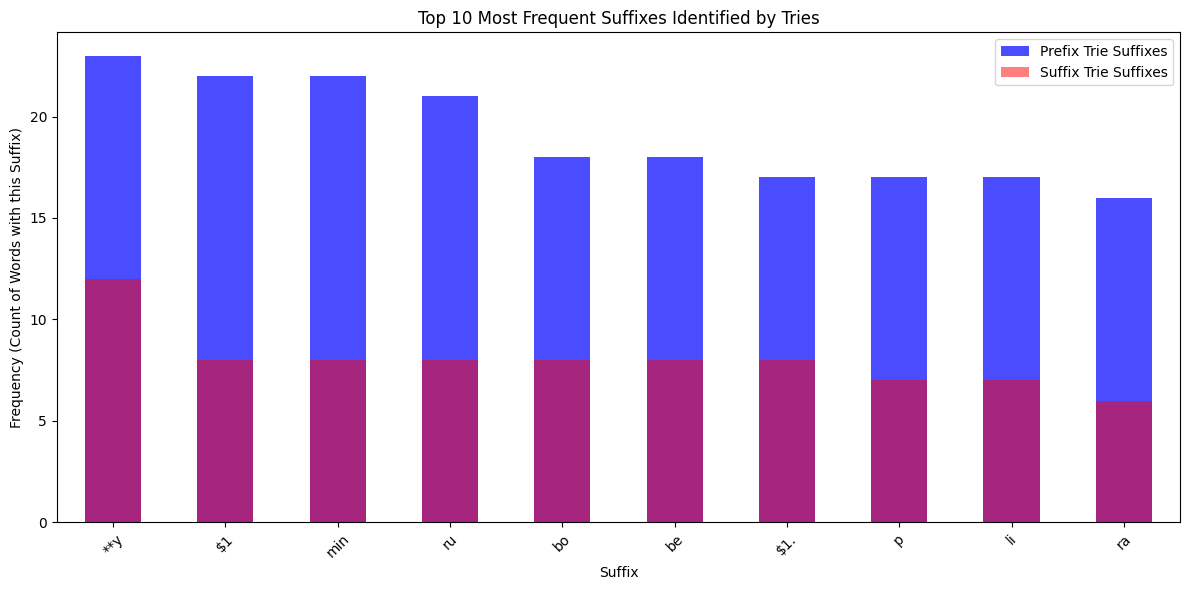

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math # Added for entropy calculation (log)

# --- Load Data ---
try:
    with open('brown_nouns.txt', 'r') as f:
        # Read words, strip whitespace, convert to lowercase, and get unique entries
        words = sorted(list(set([line.strip().lower() for line in f])))
    print(f"Successfully loaded {len(words)} unique words from brown_nouns.txt")
except FileNotFoundError:
    print("Error: brown_nouns.txt not found. Please make sure the file is in the correct directory.")
    words = [] # Set words to empty list to avoid crashing the script

# --- Trie Data Structure ---
class TrieNode:
    def __init__(self):
        self.children = {}
        self.word_end = False
        self.words_at_node = set()

class Trie:
    def __init__(self):
        self.root = TrieNode()
        # Initialize total_nodes with 1 for the root node
        self.total_nodes = 1

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
                self.total_nodes += 1 # Increment when a new node is created
            node = node.children[char]
            node.words_at_node.add(word)
        node.word_end = True

    def insert_reversed(self, word):
        node = self.root
        for char in word[::-1]:
            if char not in node.children:
                node.children[char] = TrieNode()
                self.total_nodes += 1 # Increment when a new node is created
            node = node.children[char]
            node.words_at_node.add(word)
        node.word_end = True

    def split_stem_suffix(self, word, reverse=False):
        node = self.root
        branching_index = 0
        max_branch = 0
        traversed = []
        word_seq = word[::-1] if reverse else word
        
        # Check if the word exists in the trie
        temp_node = self.root
        path_exists = True
        for char in word_seq:
            if char in temp_node.children:
                temp_node = temp_node.children[char]
            else:
                path_exists = False
                break
        if not path_exists:
             return (word, "", 0) if not reverse else (word, "", 0)


        for idx, char in enumerate(word_seq):
            traversed.append(char)
            node = node.children[char]
            branch_count = len(node.children)
            if branch_count > max_branch:
                max_branch = branch_count
                branching_index = idx + 1

        stem = "".join(word_seq[:branching_index])
        suffix = "".join(word_seq[branching_index:])

        if reverse:
            stem = stem[::-1]
            suffix = suffix[::-1]

        return stem, suffix, max_branch

    def calculate_metrics(self, inserted_words):
        """Calculates key metrics for the trie."""
        if not self.root.children:
            return {
                "Total Nodes": 1, "Average Depth": 0,
                "Average Branching Factor": 0, "Average Entropy": 0
            }

        # Average Depth is the average length of words inserted
        depths = [len(w) for w in inserted_words]
        avg_depth = sum(depths) / len(depths) if depths else 0

        branching_factors = []
        entropies = []
        
        # Use a stack for iterative DFS traversal to avoid recursion limits
        nodes_to_visit = [self.root]

        while nodes_to_visit:
            node = nodes_to_visit.pop()

            if not node.children:
                continue
            
            # Add children to the stack for the next iteration
            nodes_to_visit.extend(node.children.values())
            
            # --- Calculate Branching Factor ---
            branching_factors.append(len(node.children))

            # --- Calculate Entropy ---
            total_words_at_node = len(node.words_at_node)
            if total_words_at_node == 0:
                continue

            current_entropy = 0
            for child_node in node.children.values():
                prob = len(child_node.words_at_node) / total_words_at_node
                if prob > 0:
                    current_entropy -= prob * math.log2(prob)
            entropies.append(current_entropy)

        return {
            "Total Nodes": self.total_nodes,
            "Average Depth": avg_depth,
            "Average Branching Factor": sum(branching_factors) / len(branching_factors) if branching_factors else 0,
            "Average Entropy": sum(entropies) / len(entropies) if entropies else 0,
        }

# --- Build Tries ---
prefix_trie = Trie()
suffix_trie = Trie()
for w in words:
    prefix_trie.insert(w)
    suffix_trie.insert_reversed(w)

# --- Calculate and Display Metrics ---
print("\n" + "="*30)
print("TRIE METRICS")
print("="*30)

print("\n--- Prefix Trie Metrics ---")
prefix_metrics = prefix_trie.calculate_metrics(words)
for metric, value in prefix_metrics.items():
    # Print integers without decimals, floats with 4 decimal places
    print(f"{metric:<25}: {value if isinstance(value, int) else f'{value:.4f}'}")

print("\n--- Suffix Trie Metrics ---")
suffix_metrics = suffix_trie.calculate_metrics(words)
for metric, value in suffix_metrics.items():
    print(f"{metric:<25}: {value if isinstance(value, int) else f'{value:.4f}'}")
print("\n" + "="*30 + "\n")


# --- Perform Stem/Suffix Splitting ---
prefix_results = []
suffix_results = []
prefix_frequencies = {}
suffix_frequencies = {}

for w in words:
    stem, suffix, freq = prefix_trie.split_stem_suffix(w)
    prefix_results.append({'word': w, 'stem': stem, 'suffix': suffix, 'freq': freq})
    if suffix:
        prefix_frequencies[suffix] = prefix_frequencies.get(suffix, 0) + 1
        
    stem_s, suffix_s, freq_s = suffix_trie.split_stem_suffix(w, reverse=True)
    suffix_results.append({'word': w, 'stem': stem_s, 'suffix': suffix_s, 'freq': freq_s})
    if suffix_s:
        suffix_frequencies[suffix_s] = suffix_frequencies.get(suffix_s, 0) + 1

# --- Data Analysis and Visualization ---
prefix_df = pd.DataFrame(prefix_results)
suffix_df = pd.DataFrame(suffix_results)

prefix_freq_series = pd.Series(prefix_frequencies)
suffix_freq_series = pd.Series(suffix_frequencies)

plt.figure(figsize=(12, 6))
prefix_freq_series.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.7, color='blue', label='Prefix Trie Suffixes')
suffix_freq_series.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.5, color='red', label='Suffix Trie Suffixes')
plt.title('Top 10 Most Frequent Suffixes Identified by Tries')
plt.xlabel('Suffix')
plt.ylabel('Frequency (Count of Words with this Suffix)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('suffix_freq_plot.png')
print("Generated suffix frequency plot: 'suffix_freq_plot.png'")

prefix_df.to_csv('prefix_stem_suffix.csv', index=False)
suffix_df.to_csv('suffix_stem_suffix.csv', index=False)
print("Generated CSV outputs: 'prefix_stem_suffix.csv' and 'suffix_stem_suffix.csv'")